In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


## Define states

<170654> Loading distances between samples already computed ...
<170654> Consensus clustering with 30 clusterings ...
<170654> k=12 ...
<170654> 	Permuting distance matrix with repeat and clustering (0/30) ...
<170654> 	Permuting distance matrix with repeat and clustering (10/30) ...
<170655> 	Permuting distance matrix with repeat and clustering (20/30) ...
<170655> 	Making consensus matrix from 30 hierarchical clusterings of randomized distance matrix ...


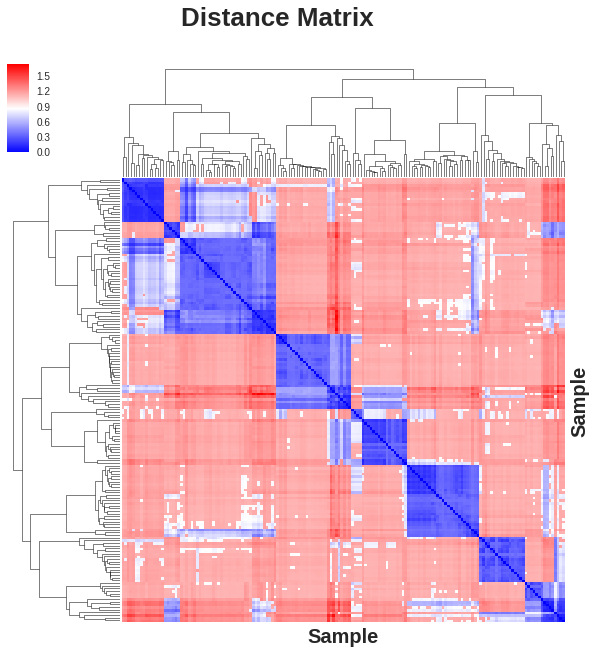

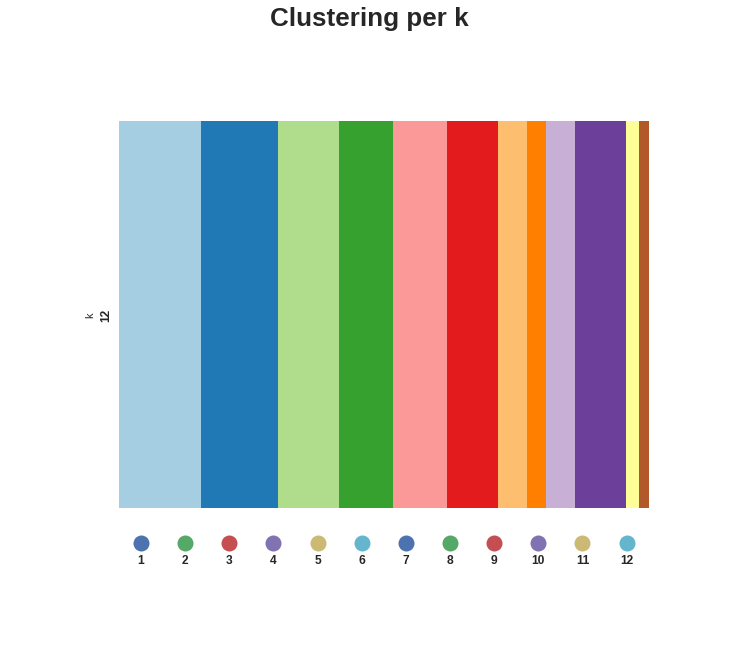

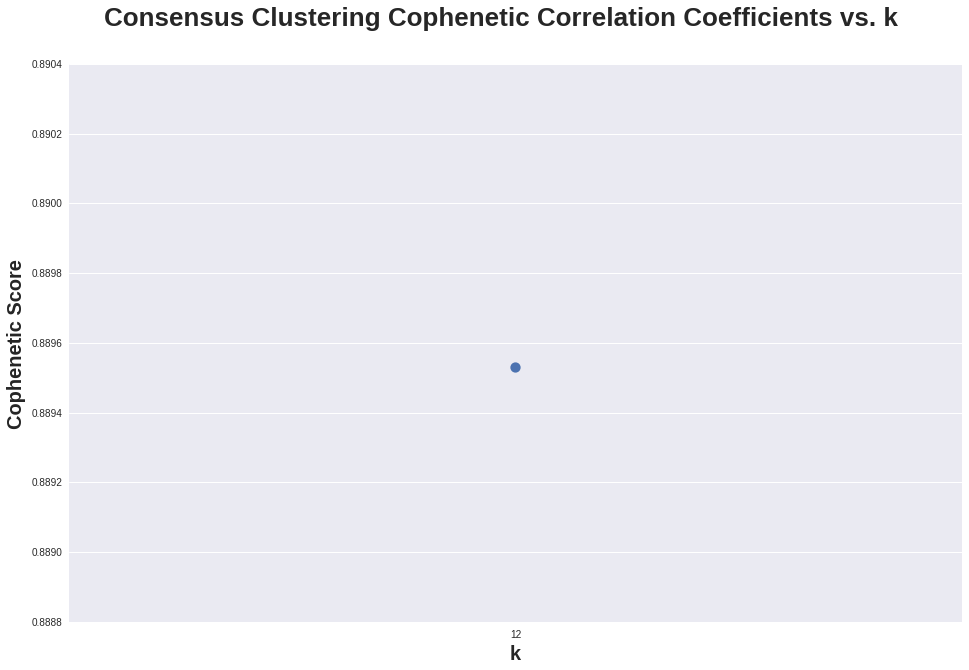

In [2]:
h = ccal.support.read_gct('data/hema_k9_H.gct')
ks = [12]
# distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
#                                                                            ks,
#                                                                            n_clusterings=30,
#                                                                            max_std=5,
#                                                                            directory_path='result/define_states/')
distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
                                                                                 ks,
                                                                                 distance_matrix=ccal.read_gct('data/hema_k9_distance_matrix.gct'),
                                                                                 n_clusterings=30,
                                                                                 max_std=5)
state_labels = clusterings.ix[12, :]

## Make Onco-GPS with real data

<170656> Training Onco-GPS with 9 components, 166 samples, and 12 states ...
<170656> 	Components: {'nmf_compC5_9', 'nmf_compC7_9', 'nmf_compC8_9', 'nmf_compC4_9', 'nmf_compC9_9', 'nmf_compC6_9', 'nmf_compC2_9', 'nmf_compC1_9', 'nmf_compC3_9'}
<170656> 	Training states: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
<170656> Computing component coordinates using informational distance ...
<170656> Computing associations (axis=1) between matrices (0/9) ...
<170656> Computing associations (axis=1) between matrices (1/9) ...
<170656> Computing associations (axis=1) between matrices (2/9) ...
<170656> Computing associations (axis=1) between matrices (3/9) ...
<170656> Computing associations (axis=1) between matrices (4/9) ...
<170656> Computing associations (axis=1) between matrices (5/9) ...
<170656> Computing associations (axis=1) between matrices (6/9) ...
<170656> Computing associations (axis=1) between matrices (7/9) ...
<170656> Computing associations (axis=1) between matrices (8/9) ...
<17

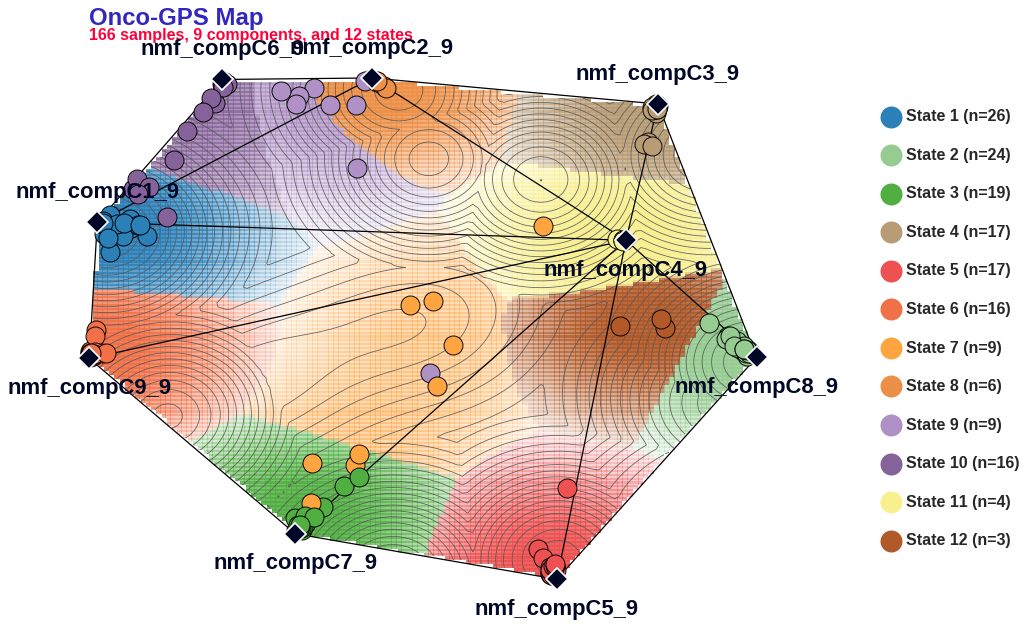

In [3]:
output = ccal.make_oncogps_map(h, state_labels, component_ratio=2,
#                                background_markersize=0, background_mask_markersize=0,
                               filepath='result/make_oncogps_map.pdf')

## Project samples

<170751> 	Testing normalization: using_training
<170751> Training Onco-GPS with 9 components, 166 samples, and 12 states ...
<170751> 	Components: {'nmf_compC5_9', 'nmf_compC7_9', 'nmf_compC8_9', 'nmf_compC4_9', 'nmf_compC9_9', 'nmf_compC6_9', 'nmf_compC2_9', 'nmf_compC1_9', 'nmf_compC3_9'}
<170751> 	Training states: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
<170751> Computing component coordinates using informational distance ...
<170751> Computing associations (axis=1) between matrices (0/9) ...
<170752> Computing associations (axis=1) between matrices (1/9) ...
<170752> Computing associations (axis=1) between matrices (2/9) ...
<170752> Computing associations (axis=1) between matrices (3/9) ...
<170752> Computing associations (axis=1) between matrices (4/9) ...
<170752> Computing associations (axis=1) between matrices (5/9) ...
<170752> Computing associations (axis=1) between matrices (6/9) ...
<170752> Computing associations (axis=1) between matrices (7/9) ...
<170752> Computing asso

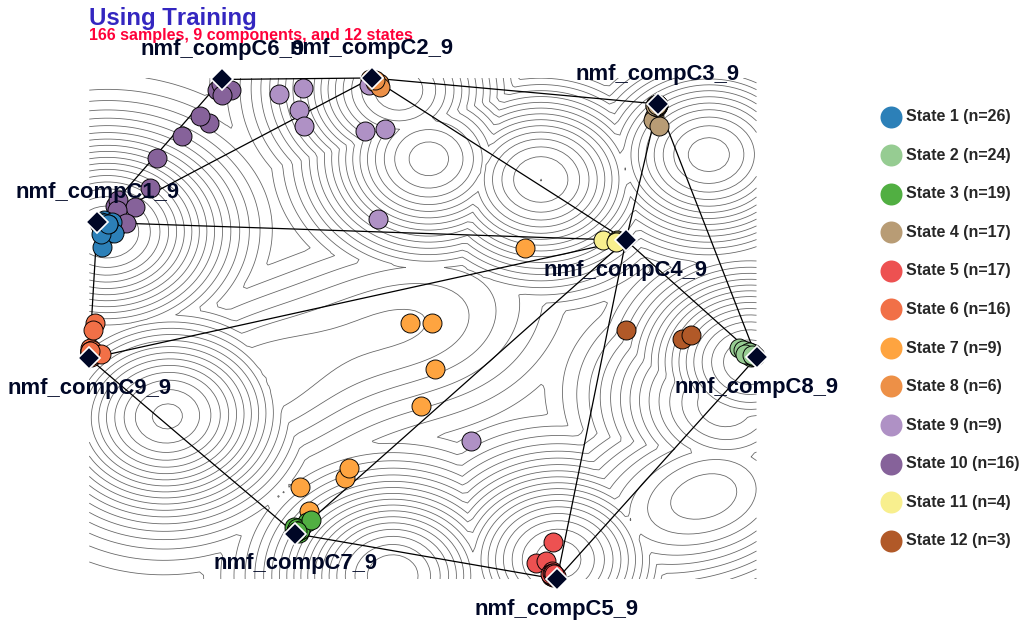

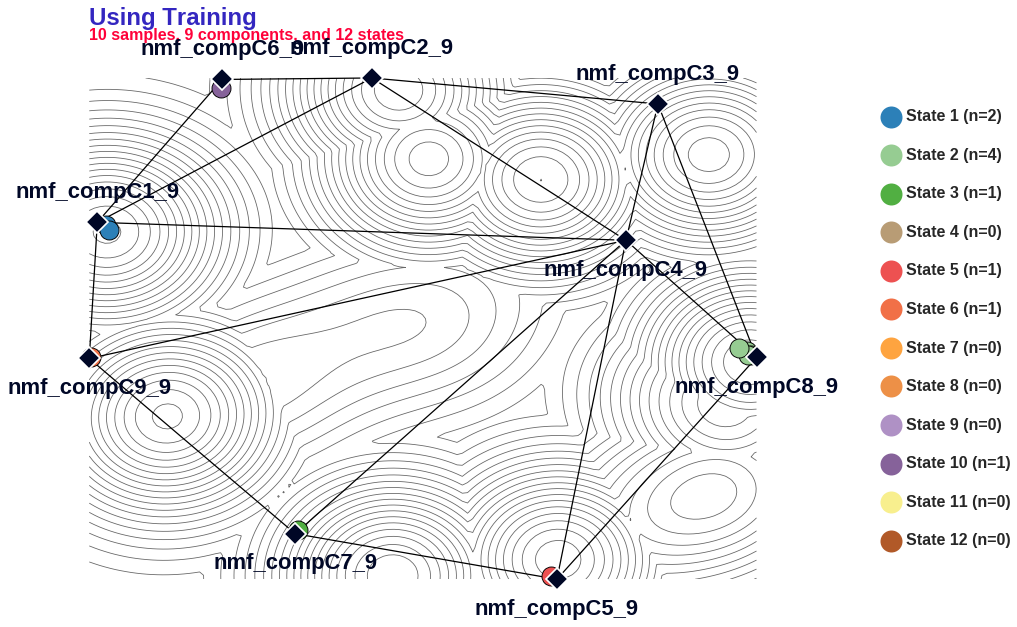

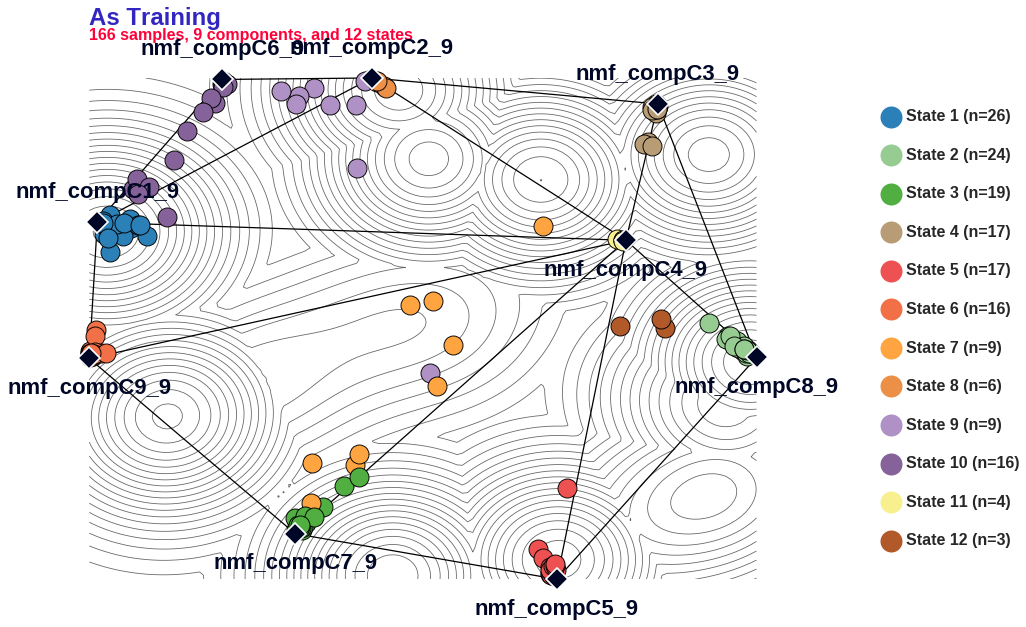

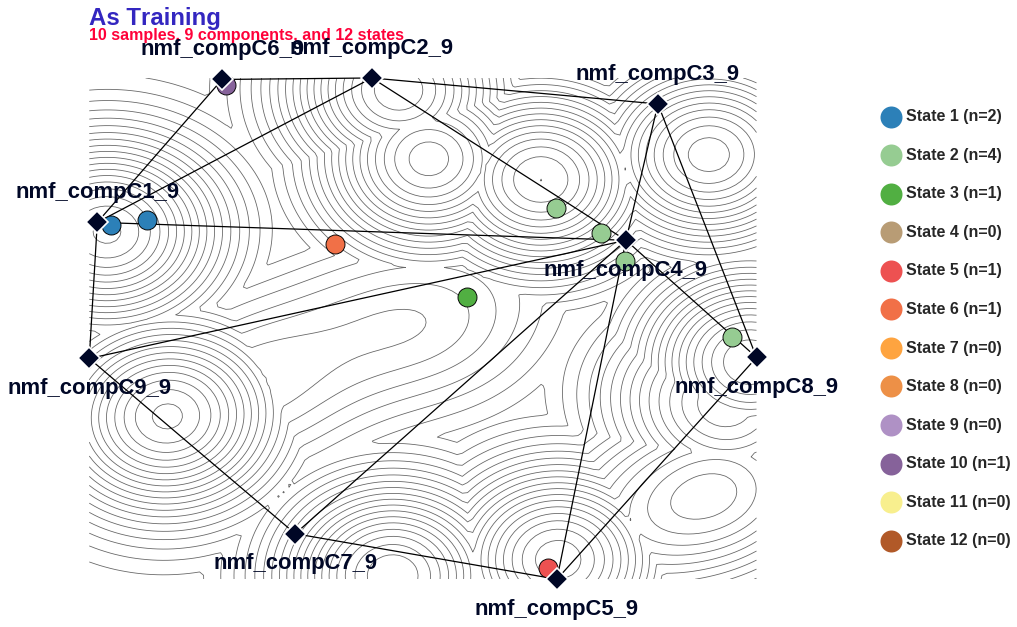

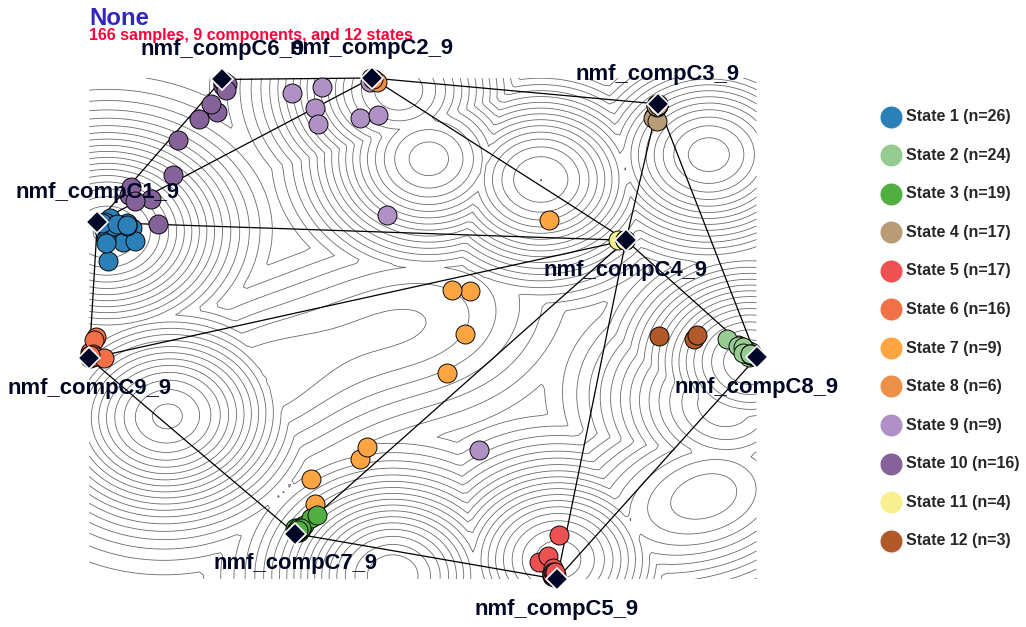

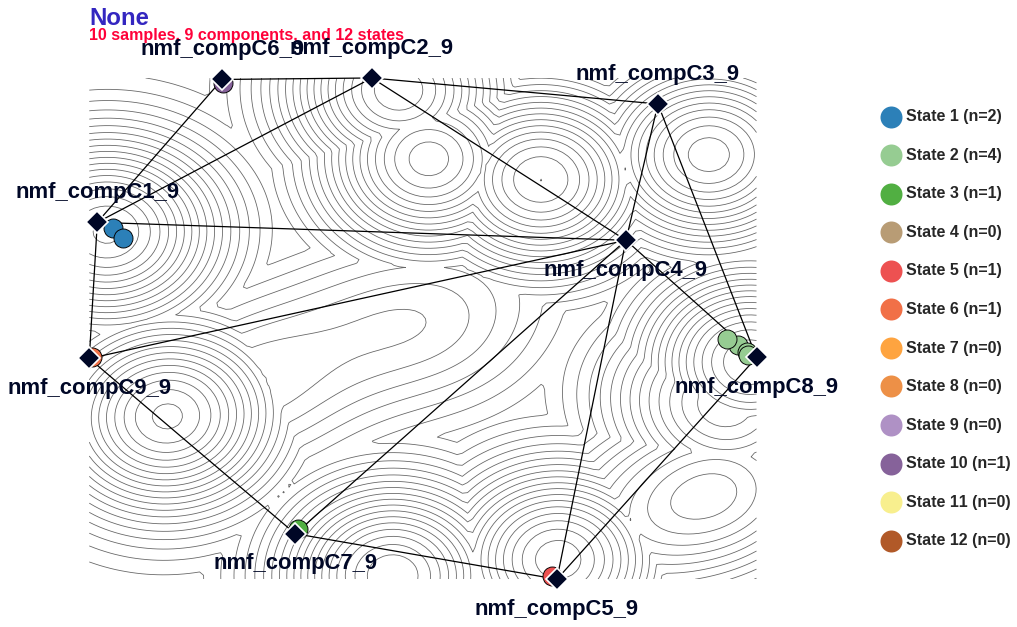

In [4]:
# output = ccal.make_oncogps_map(h, state_labels)
n = 10

output1 = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                                testing_h_normalization='using_training',
                                background_markersize=0, background_mask_markersize=0,
                                title='Using Training')
output2 = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                                testing_h_normalization='using_training',
                                background_markersize=0, background_mask_markersize=0,
                                title='Using Training')

output = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                               testing_h_normalization='as_training',
                               background_markersize=0, background_mask_markersize=0,
                               title='As Training')
output = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                               testing_h_normalization='as_training',
                               background_markersize=0, background_mask_markersize=0,
                               title='As Training')

output = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                               testing_h_normalization=None,
                               background_markersize=0, background_mask_markersize=0,
                               title='None')
output = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                               testing_h_normalization=None,
                               background_markersize=0, background_mask_markersize=0,
                               title='None')

try:
    output = ccal.make_oncogps_map(h, state_labels,
                                   testing_h=h, testing_states=state_labels,
                                   testing_h_normalization='foo')
except ValueError as e:
    print(e)

## Make Onco-GPS with random data